Medoid indices: [67, 7, 77]


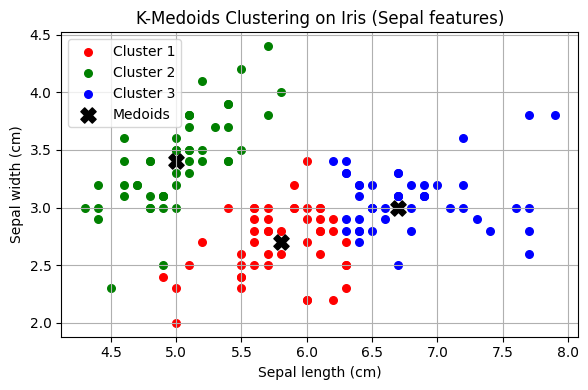

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# pip install pyclustering
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix

# Load your Iris CSV
df = pd.read_csv(r"D:\Coding\MSc\3rd sem\Datasets\AI&ML_Dataset\Iris.csv")

# Take only the two columns you want for plotting
X_2d = df[['SepalLengthCm', 'SepalWidthCm']].values   # convert to numpy array

# Distance matrix for k-medoids
distance_matrix = calculate_distance_matrix(X_2d)     # expects numeric sequence, not DataFrame [web:29][web:37]

# K-medoids parameters
k = 3
np.random.seed(42)
initial_medoids = np.random.choice(len(X_2d), size=k, replace=False).tolist()

# Run k-medoids on distance matrix
kmedoids_instance = kmedoids(
    data=distance_matrix,
    initial_index_medoids=initial_medoids,
    data_type='distance_matrix'
)
kmedoids_instance.process()

clusters = kmedoids_instance.get_clusters()           # list of index lists
medoids = kmedoids_instance.get_medoids()             # list of medoid indices

print("Medoid indices:", medoids)

# ---------- Plot ----------
colors = ['red', 'green', 'blue']

plt.figure(figsize=(6, 4))

# Plot cluster points
for cluster_id, cluster in enumerate(clusters):
    points = X_2d[cluster]                            # index numpy array with cluster indices
    plt.scatter(points[:, 0], points[:, 1],
                s=30,
                c=colors[cluster_id],
                label=f"Cluster {cluster_id + 1}")

# Plot medoids (larger black markers)
medoid_points = X_2d[medoids]
plt.scatter(medoid_points[:, 0], medoid_points[:, 1],
            s=120, c='black', marker='X', label='Medoids')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('K-Medoids Clustering on Iris (Sepal features)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
